In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [8]:
def plot_hist(image_path):
    image = Image.open(image_path)
    
    # Convert the image data to a numpy array
    image_data = np.asarray(image)
    
    # Flatten the image data to 1D (since it's grayscale, we only have one channel)
    pixels = image_data.flatten()
    
    # Plot the histogram
    plt.hist(pixels, bins=256, range=(0,256), density=True, alpha=0.75, color='gray')
    plt.title('Histogram of Pixel Values')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    
    # Show the plot
    plt.show()


In [99]:
def filter_image(image_path,threshold,save_dir):
    
    image = Image.open(image_path)

    save_path = save_dir+f"{image_path.split('/')[1]}"
      
    # Convert the image data to a numpy array
    image_data = np.asarray(image)

    thresholded_data = np.where(image_data < threshold, 0, image_data)

    # Convert numpy arrays back to PIL images
    image_thresholded = Image.fromarray(np.uint8(thresholded_data))

    # Save the thresholded image to the specified path
    image_thresholded.save(save_path)
    
    non_zero_sum = np.sum(thresholded_data[thresholded_data > 0])
    # Plotting both original and thresholded images
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    # Original image
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    
    # Thresholded image
    ax[1].imshow(image_thresholded, cmap='gray')
    ax[1].set_title('Thresholded Image')
    ax[1].axis('off')
    
    plt.show()
    print('canopy volume  ',non_zero_sum)

In [ ]:
def volume():

In [40]:
def avg_pixel_val(image_path):
    image = Image.open(image_path)
    
    # Convert the image data to a numpy array
    image_data = np.asarray(image)
    
    # Flatten the image data to 1D (since it's grayscale, we only have one channel)
    pixels = image_data.flatten()
    print(sum(pixels)/len(pixels))

In [27]:
def avg_folder_histogram(image_folder):
    
    # Initialize an empty list to store all pixel values from all images
    all_pixels = []
    
    # Loop through each image in the folder
    for filename in os.listdir(image_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):  # Add or remove file types as needed
            image_path = os.path.join(image_folder, filename)
            image = Image.open(image_path)
    
            # Convert the image to grayscale
            image = image.convert('L')
    
            # Convert the image data to a numpy array and flatten it
            image_data = np.asarray(image).flatten()
    
            # Append the image data to the all_pixels list
            all_pixels.extend(image_data)
    
    # Convert all_pixels list to a numpy array
    all_pixels = np.array(all_pixels)
    
    # Plot the histogram
    plt.hist(all_pixels, bins=256, range=(0,256), density=True, alpha=0.75, color='gray')
    plt.title('Combined Histogram of Pixel Values')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    
    # Show the plot
    plt.show()

In [62]:
def data_analysis_image(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Calculate the histogram
    # 256 because we have 256 possibilities from 0 to 255 for a grayscale image
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
    
    # Find the pixel value with the highest frequency
    max_freq_index = np.argmax(histogram[15:256])+15
    print(f"Pixel value with the highest frequency: {max_freq_index}")
    
    # Calculate the mean of the histogram data
    # We weight the histogram bins by their respective indices (pixel values)
    hist_mean = np.average(range(256), weights=histogram.flatten())
    print(f"Mean of the histogram data: {hist_mean}")
    
    # Calculate the standard deviation of the histogram data
    # We calculate it similarly to the mean, using the histogram as weights
    hist_std = np.sqrt(np.average((range(256)-hist_mean)**2, weights=histogram.flatten()))
    print(f"Standard deviation of the histogram data: {hist_std}")
    cutting_point = max_freq_index+(int(hist_std/2))
    print(f"cutting point is: {cutting_point}")
    return cutting_point


In [80]:
def focused_data_analysis_image(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Calculate the histogram
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
    
    # Focus on the histogram values from 15 to 255
    focused_histogram = histogram[15:256]
    
    # Find the pixel value with the highest frequency in the focused range
    max_freq_index = np.argmax(focused_histogram) + 15
    print(f"Pixel value with the highest frequency (in the range 15-255): {max_freq_index}")
    
    # Calculate the mean of the focused histogram data
    # We weight the focused histogram bins by their respective indices (pixel values in the range 15-255)
    focused_range = np.arange(15, 256)
    hist_mean = np.average(range(256), weights=histogram.flatten())
    print(f"Mean of the focused histogram data: {hist_mean}")
    
    # Calculate the standard deviation of the focused histogram data
    hist_std = np.sqrt(np.average((range(256)-hist_mean)**2, weights=histogram.flatten()))
    print(f"Standard deviation of the focused histogram data: {hist_std}")
    
    # Define a cutting point based on the max frequency index and standard deviation
    cutting_point = max_freq_index + int(hist_std / 2) + int(hist_std / 10)
    print(f"Cutting point is: {cutting_point}")
    
    return cutting_point

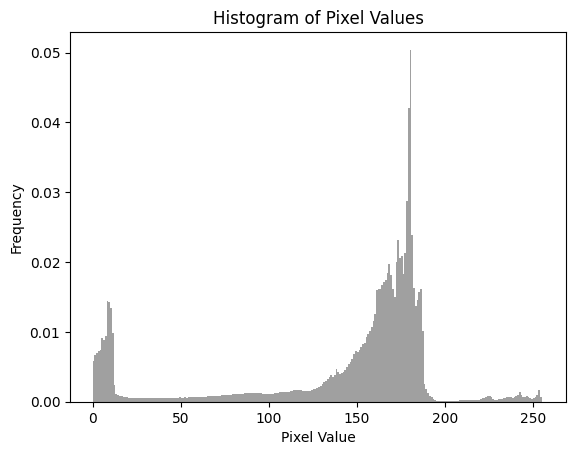

In [47]:
plot_hist('20231204_B11_Depth_grayscale/RGB_20231204_B11_0_depth.png')


In [48]:
data_analysis_image('20231204_B11_Depth_grayscale/RGB_20231204_B11_0_depth.png')

Pixel value with the highest frequency: 180
Mean of the histogram data: 141.46688319830247
Standard deviation of the histogram data: 59.38796133641611
cutting point is: 209


In [49]:
avg_pixel_val('20231204_B11_Depth_grayscale/RGB_20231204_B11_0_depth.png')

141.46688319830247


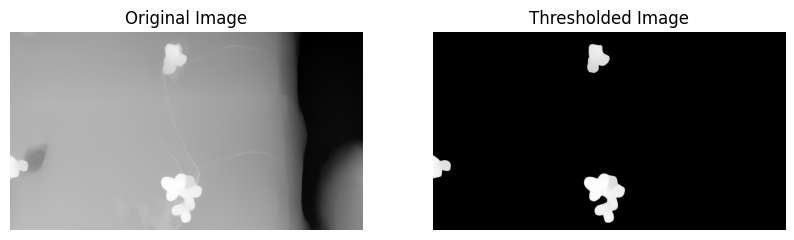

In [50]:
filter_image('20231204_B11_Depth_grayscale/RGB_20231204_B11_0_depth.png',209)

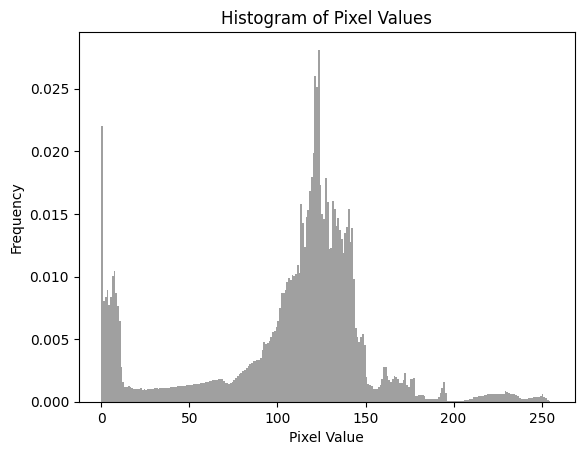

In [43]:
plot_hist('20231204_B11_Depth_grayscale/RGB_20231204_B11_1_depth.png')

In [51]:
data_analysis_image('20231204_B11_Depth_grayscale/RGB_20231204_B11_1_depth.png')

Pixel value with the highest frequency: 123
Mean of the histogram data: 106.17825183256173
Standard deviation of the histogram data: 48.35486160988566
cutting point is: 147


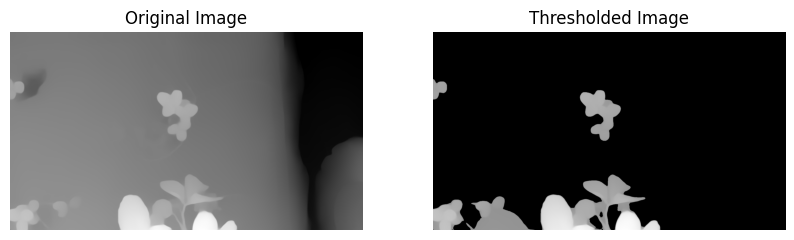

In [52]:
filter_image('20231204_B11_Depth_grayscale/RGB_20231204_B11_1_depth.png',147)

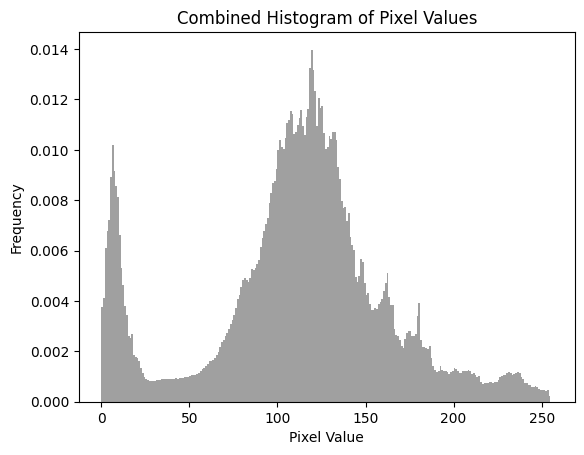

In [29]:
avg_folder_histogram('20231204_B11_Depth_grayscale/')

In [54]:
img_dir = '20231204_B11_Depth_grayscale/'
images = os.listdir(img_dir)

RGB_20231204_B11_13_depth.png
Pixel value with the highest frequency: 122
Mean of the histogram data: 104.94305700231482
Standard deviation of the histogram data: 44.970129786170105
cutting point is: 144


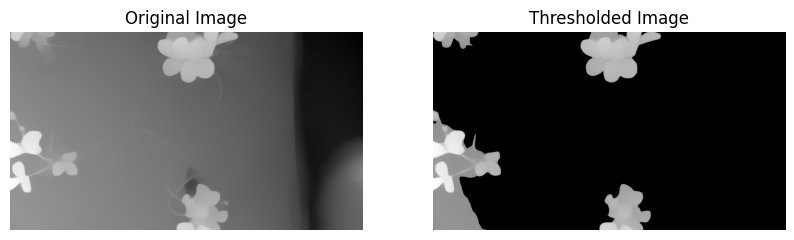

canopy volume   139890945
RGB_20231204_B11_7_depth.png
Pixel value with the highest frequency: 100
Mean of the histogram data: 97.95701919367283
Standard deviation of the histogram data: 50.39407321241354
cutting point is: 125


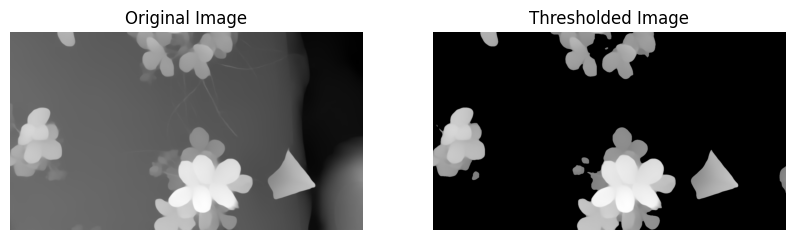

canopy volume   203963406
RGB_20231204_B11_10_depth.png
Pixel value with the highest frequency: 133
Mean of the histogram data: 112.3411115933642
Standard deviation of the histogram data: 49.072860414707186
cutting point is: 157


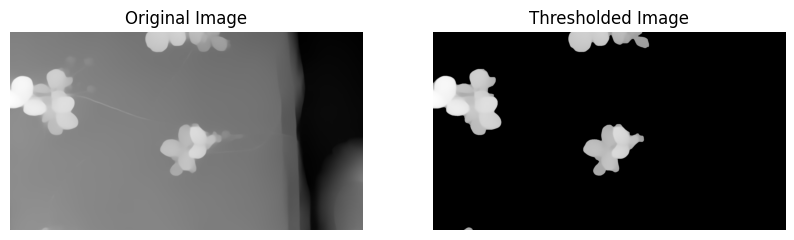

canopy volume   98492208
RGB_20231204_B11_11_depth.png
Pixel value with the highest frequency: 119
Mean of the histogram data: 104.9782880015432
Standard deviation of the histogram data: 46.89279728232297
cutting point is: 142


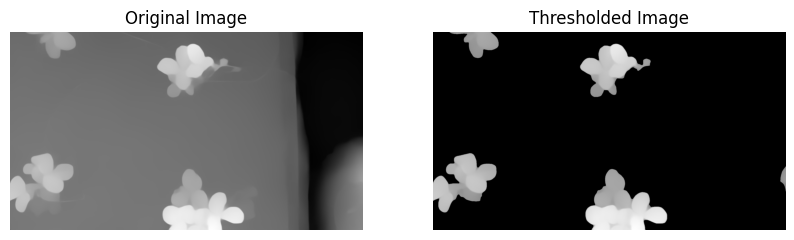

canopy volume   125423184
RGB_20231204_B11_3_depth.png
Pixel value with the highest frequency: 102
Mean of the histogram data: 91.31570360725308
Standard deviation of the histogram data: 49.894058780414404
cutting point is: 126


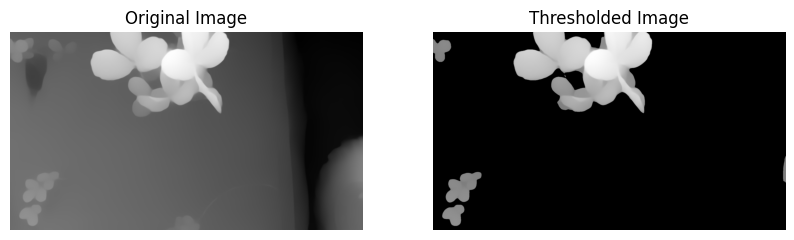

canopy volume   143593596
RGB_20231204_B11_18_depth.png
Pixel value with the highest frequency: 123
Mean of the histogram data: 114.37550588348765
Standard deviation of the histogram data: 54.13323605881623
cutting point is: 150


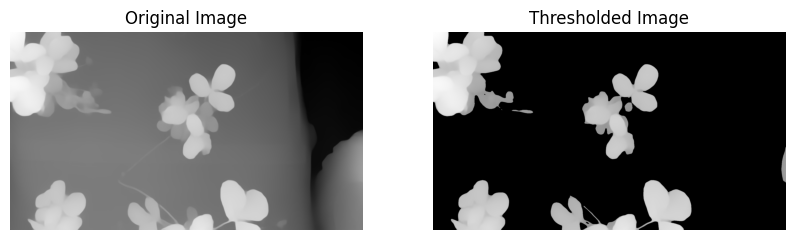

canopy volume   230432916
RGB_20231204_B11_1_depth.png
Pixel value with the highest frequency: 123
Mean of the histogram data: 106.17825183256173
Standard deviation of the histogram data: 48.35486160988566
cutting point is: 147


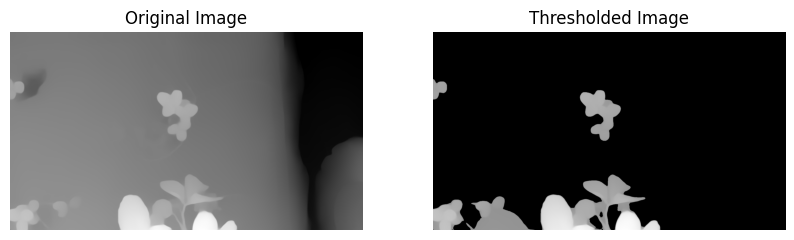

canopy volume   103135713
RGB_20231204_B11_0_depth.png
Pixel value with the highest frequency: 180
Mean of the histogram data: 141.46688319830247
Standard deviation of the histogram data: 59.38796133641611
cutting point is: 209


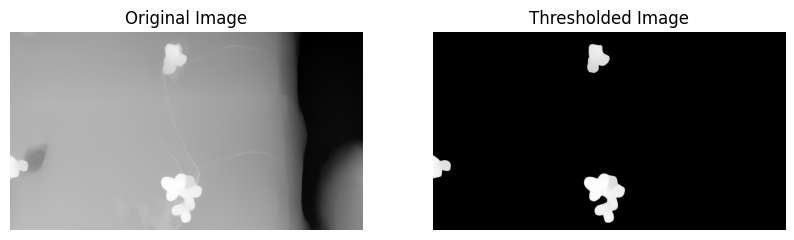

canopy volume   37900695
RGB_20231204_B11_5_depth.png
Pixel value with the highest frequency: 106
Mean of the histogram data: 89.8806602044753
Standard deviation of the histogram data: 44.434801779572524
cutting point is: 128


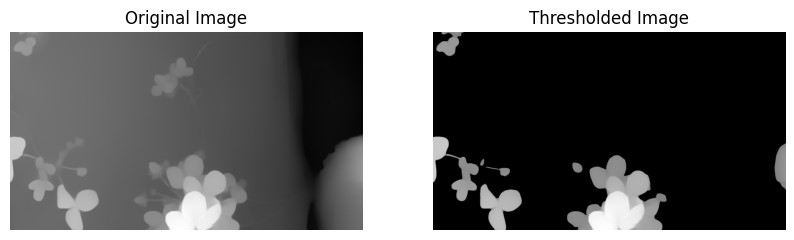

canopy volume   110763375
RGB_20231204_B11_16_depth.png
Pixel value with the highest frequency: 131
Mean of the histogram data: 109.03410059799383
Standard deviation of the histogram data: 47.83429704531824
cutting point is: 154


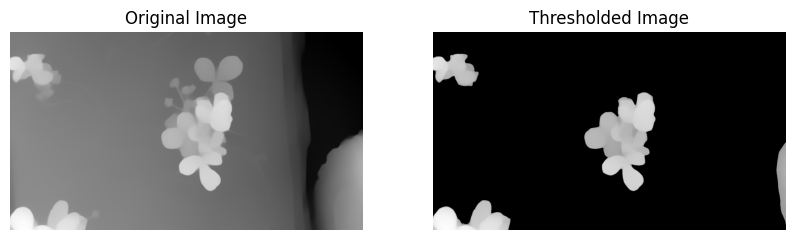

canopy volume   118908423
RGB_20231204_B11_17_depth.png
Pixel value with the highest frequency: 140
Mean of the histogram data: 122.341875
Standard deviation of the histogram data: 56.04404048355212
cutting point is: 168


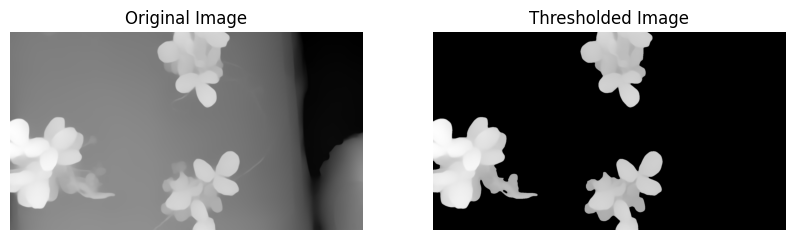

canopy volume   222067641
RGB_20231204_B11_8_depth.png
Pixel value with the highest frequency: 121
Mean of the histogram data: 114.01666521990741
Standard deviation of the histogram data: 56.00362200441869
cutting point is: 149


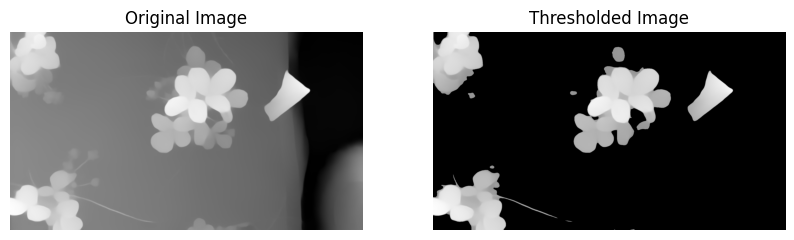

canopy volume   201694932
RGB_20231204_B11_15_depth.png
Pixel value with the highest frequency: 133
Mean of the histogram data: 110.29425298996914
Standard deviation of the histogram data: 48.30504281958688
cutting point is: 157


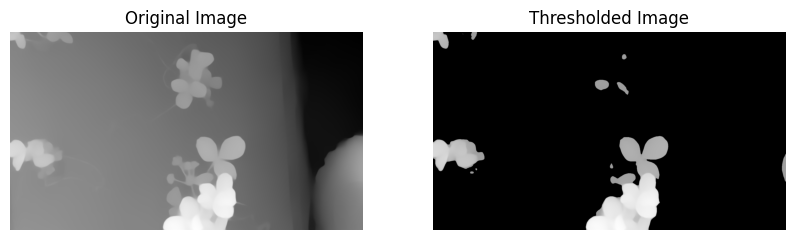

canopy volume   100177800
RGB_20231204_B11_14_depth.png
Pixel value with the highest frequency: 145
Mean of the histogram data: 116.83325135030864
Standard deviation of the histogram data: 48.745525442201185
cutting point is: 169


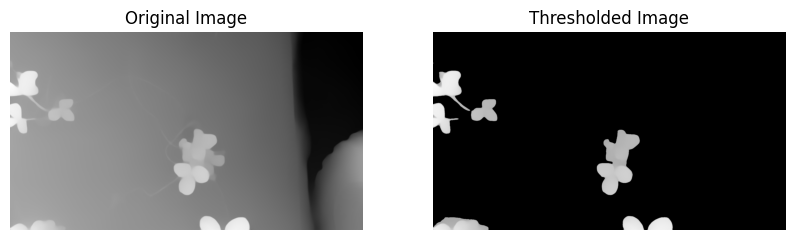

canopy volume   71041497
RGB_20231204_B11_12_depth.png
Pixel value with the highest frequency: 162
Mean of the histogram data: 135.91287905092594
Standard deviation of the histogram data: 52.478291584256716
cutting point is: 188


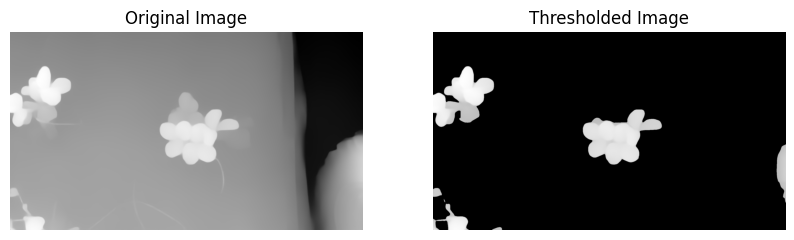

canopy volume   103431195
RGB_20231204_B11_4_depth.png
Pixel value with the highest frequency: 147
Mean of the histogram data: 129.23119020061728
Standard deviation of the histogram data: 49.04367811660679
cutting point is: 171


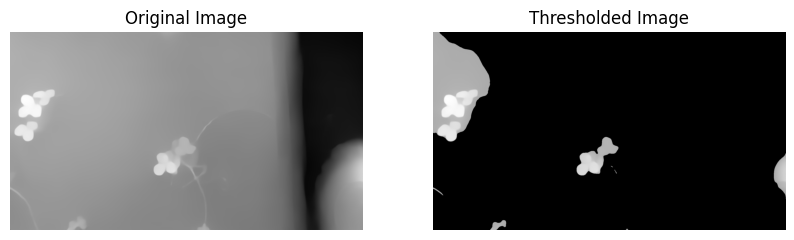

canopy volume   90558840
RGB_20231204_B11_2_depth.png
Pixel value with the highest frequency: 119
Mean of the histogram data: 95.13409239969135
Standard deviation of the histogram data: 50.958712101647464
cutting point is: 144


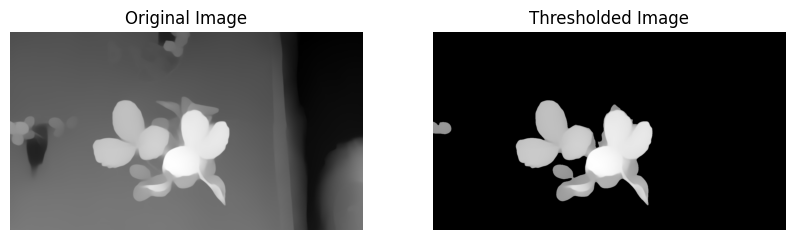

canopy volume   139218960
RGB_20231204_B11_6_depth.png
Pixel value with the highest frequency: 108
Mean of the histogram data: 97.01705680941357
Standard deviation of the histogram data: 49.734866378615514
cutting point is: 132


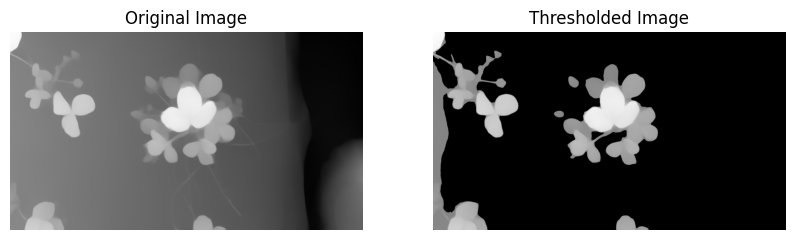

canopy volume   164472393
RGB_20231204_B11_9_depth.png
Pixel value with the highest frequency: 120
Mean of the histogram data: 114.11295042438272
Standard deviation of the histogram data: 55.477444973308266
cutting point is: 147


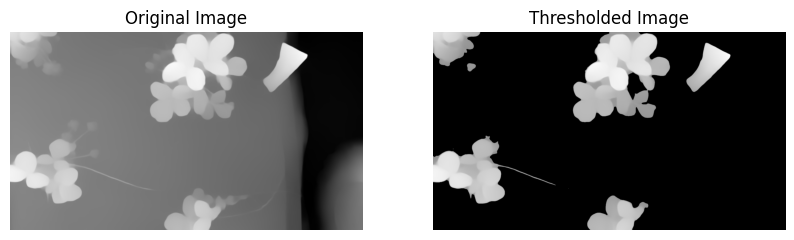

canopy volume   208239204


In [102]:
for image in images:
    print(image)
    cutting_point = data_analysis_image(img_dir+image)
    filter_image(img_dir+image,cutting_point,'20231204_B11_Depth_grayscale_filtered/')

RGB_20231204_B11_13_depth.png
Pixel value with the highest frequency (in the range 15-255): 122
Mean of the focused histogram data: 104.94305700231482
Standard deviation of the focused histogram data: 44.970129786170105
Cutting point is: 148


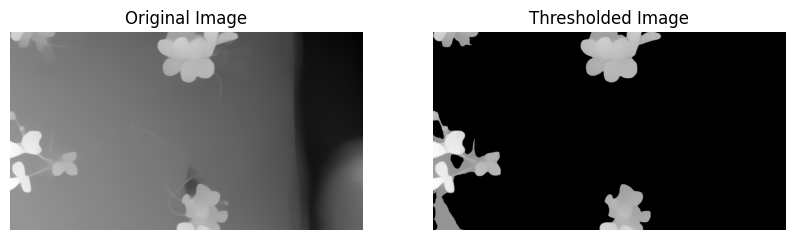

RGB_20231204_B11_7_depth.png
Pixel value with the highest frequency (in the range 15-255): 100
Mean of the focused histogram data: 97.95701919367283
Standard deviation of the focused histogram data: 50.39407321241354
Cutting point is: 130


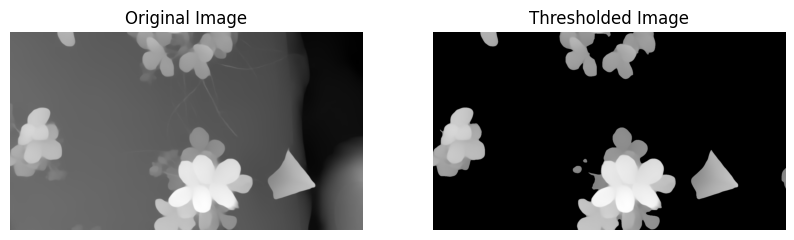

RGB_20231204_B11_10_depth.png
Pixel value with the highest frequency (in the range 15-255): 133
Mean of the focused histogram data: 112.3411115933642
Standard deviation of the focused histogram data: 49.072860414707186
Cutting point is: 161


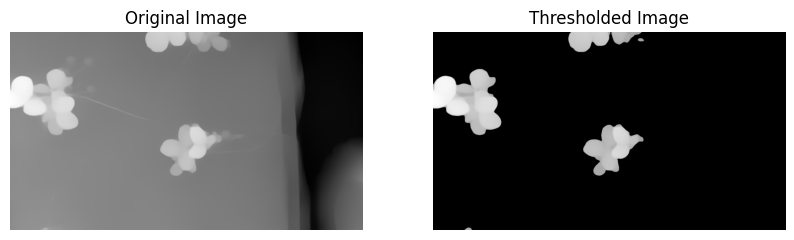

RGB_20231204_B11_11_depth.png
Pixel value with the highest frequency (in the range 15-255): 119
Mean of the focused histogram data: 104.9782880015432
Standard deviation of the focused histogram data: 46.89279728232297
Cutting point is: 146


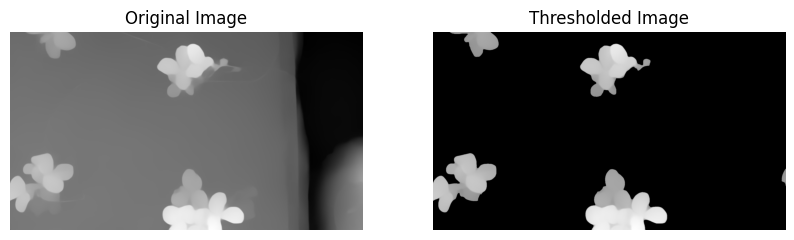

RGB_20231204_B11_3_depth.png
Pixel value with the highest frequency (in the range 15-255): 102
Mean of the focused histogram data: 91.31570360725308
Standard deviation of the focused histogram data: 49.894058780414404
Cutting point is: 130


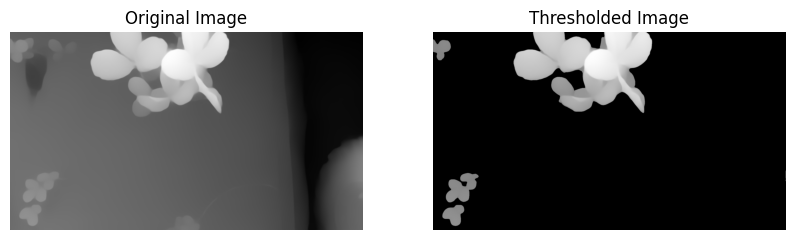

RGB_20231204_B11_18_depth.png
Pixel value with the highest frequency (in the range 15-255): 123
Mean of the focused histogram data: 114.37550588348765
Standard deviation of the focused histogram data: 54.13323605881623
Cutting point is: 155


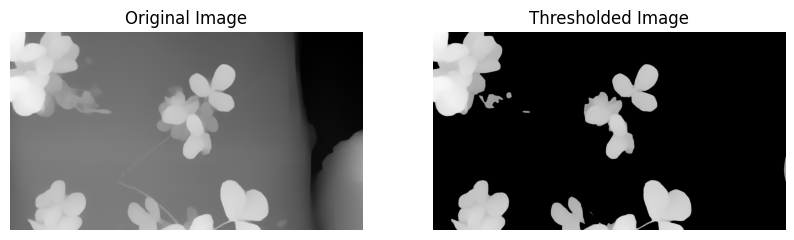

RGB_20231204_B11_1_depth.png
Pixel value with the highest frequency (in the range 15-255): 123
Mean of the focused histogram data: 106.17825183256173
Standard deviation of the focused histogram data: 48.35486160988566
Cutting point is: 151


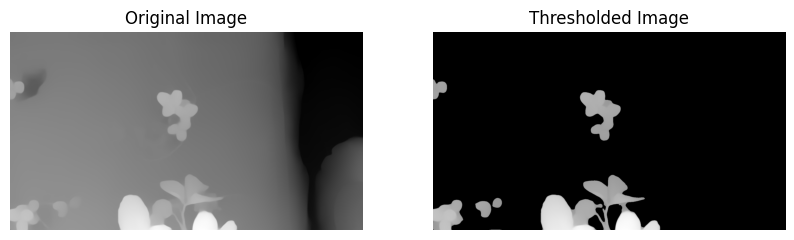

RGB_20231204_B11_0_depth.png
Pixel value with the highest frequency (in the range 15-255): 180
Mean of the focused histogram data: 141.46688319830247
Standard deviation of the focused histogram data: 59.38796133641611
Cutting point is: 214


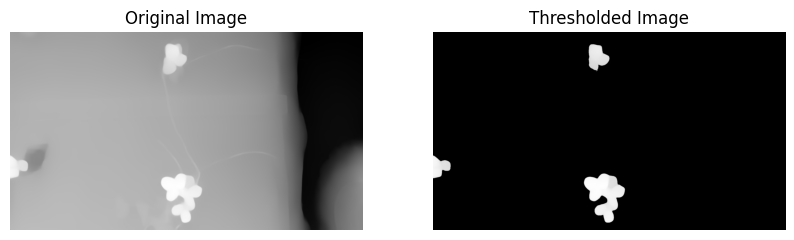

RGB_20231204_B11_5_depth.png
Pixel value with the highest frequency (in the range 15-255): 106
Mean of the focused histogram data: 89.8806602044753
Standard deviation of the focused histogram data: 44.434801779572524
Cutting point is: 132


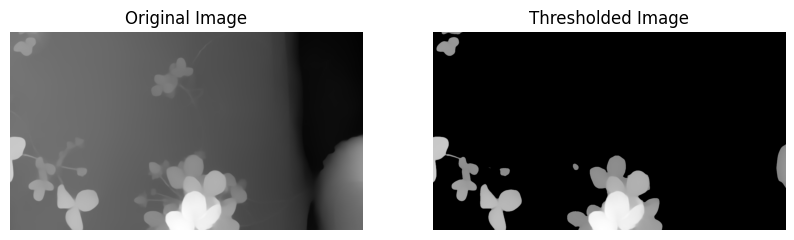

RGB_20231204_B11_16_depth.png
Pixel value with the highest frequency (in the range 15-255): 131
Mean of the focused histogram data: 109.03410059799383
Standard deviation of the focused histogram data: 47.83429704531824
Cutting point is: 158


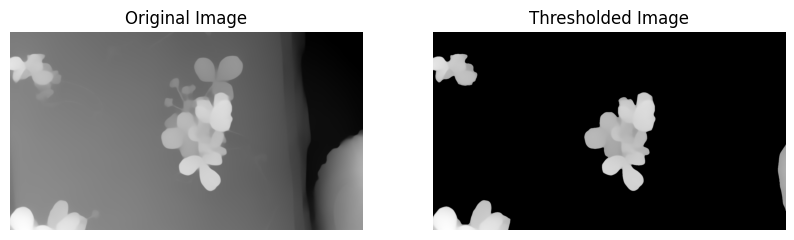

RGB_20231204_B11_17_depth.png
Pixel value with the highest frequency (in the range 15-255): 140
Mean of the focused histogram data: 122.341875
Standard deviation of the focused histogram data: 56.04404048355212
Cutting point is: 173


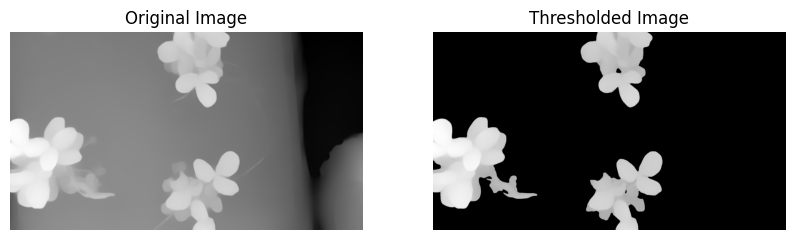

RGB_20231204_B11_8_depth.png
Pixel value with the highest frequency (in the range 15-255): 121
Mean of the focused histogram data: 114.01666521990741
Standard deviation of the focused histogram data: 56.00362200441869
Cutting point is: 154


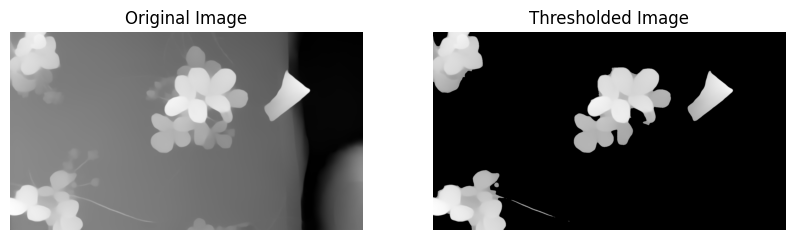

RGB_20231204_B11_15_depth.png
Pixel value with the highest frequency (in the range 15-255): 133
Mean of the focused histogram data: 110.29425298996914
Standard deviation of the focused histogram data: 48.30504281958688
Cutting point is: 161


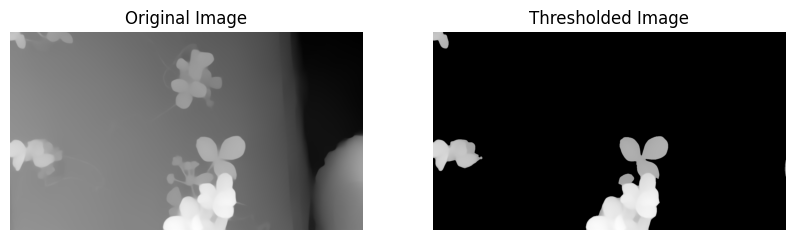

RGB_20231204_B11_14_depth.png
Pixel value with the highest frequency (in the range 15-255): 145
Mean of the focused histogram data: 116.83325135030864
Standard deviation of the focused histogram data: 48.745525442201185
Cutting point is: 173


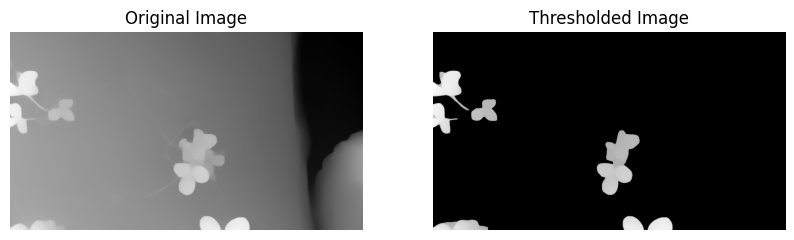

RGB_20231204_B11_12_depth.png
Pixel value with the highest frequency (in the range 15-255): 162
Mean of the focused histogram data: 135.91287905092594
Standard deviation of the focused histogram data: 52.478291584256716
Cutting point is: 193


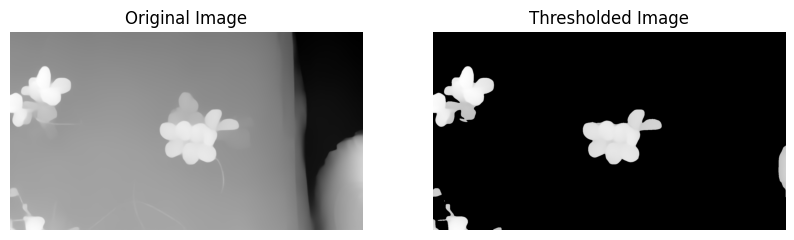

RGB_20231204_B11_4_depth.png
Pixel value with the highest frequency (in the range 15-255): 147
Mean of the focused histogram data: 129.23119020061728
Standard deviation of the focused histogram data: 49.04367811660679
Cutting point is: 175


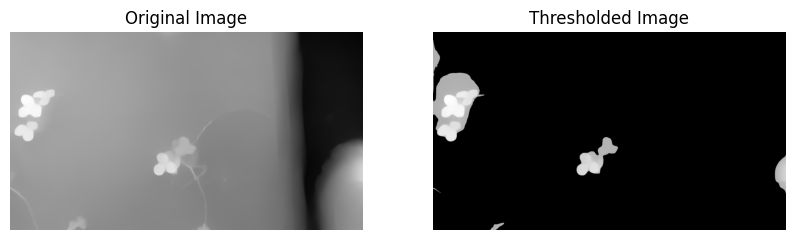

RGB_20231204_B11_2_depth.png
Pixel value with the highest frequency (in the range 15-255): 119
Mean of the focused histogram data: 95.13409239969135
Standard deviation of the focused histogram data: 50.958712101647464
Cutting point is: 149


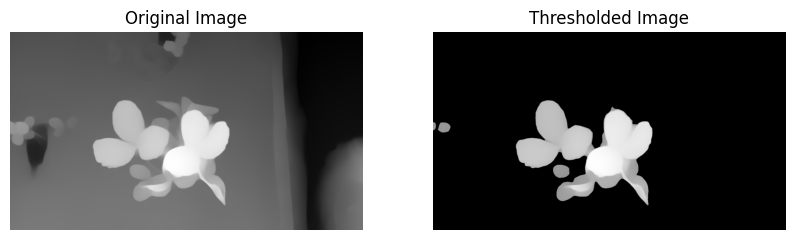

RGB_20231204_B11_6_depth.png
Pixel value with the highest frequency (in the range 15-255): 108
Mean of the focused histogram data: 97.01705680941357
Standard deviation of the focused histogram data: 49.734866378615514
Cutting point is: 136


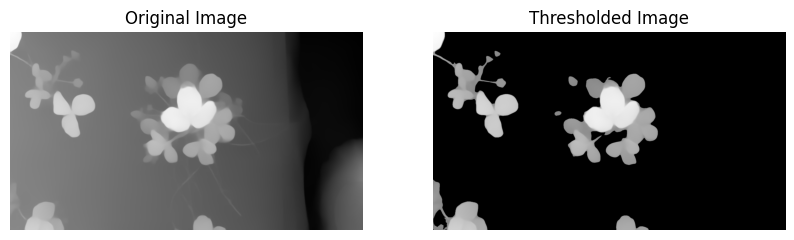

RGB_20231204_B11_9_depth.png
Pixel value with the highest frequency (in the range 15-255): 120
Mean of the focused histogram data: 114.11295042438272
Standard deviation of the focused histogram data: 55.477444973308266
Cutting point is: 152


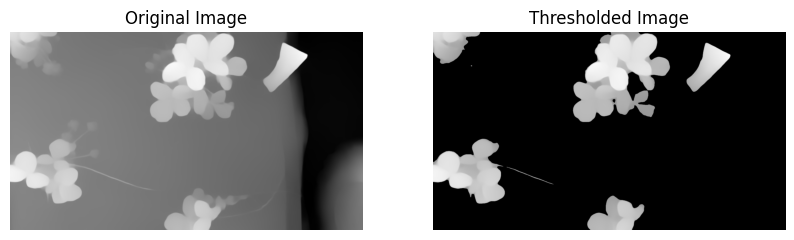

In [85]:
for image in images:
    print(image)
    cutting_point = focused_data_analysis_image(img_dir+image)
    filter_image(img_dir+image,cutting_point)

In [83]:
another_dir = '20231211_B11_Depth_grayscale/'
another_images = os.listdir(another_dir)

RGB_20231211_B11_2_depth.png
Pixel value with the highest frequency (in the range 15-255): 122
Mean of the focused histogram data: 104.59691213348765
Standard deviation of the focused histogram data: 46.97697196990481
Cutting point is: 149


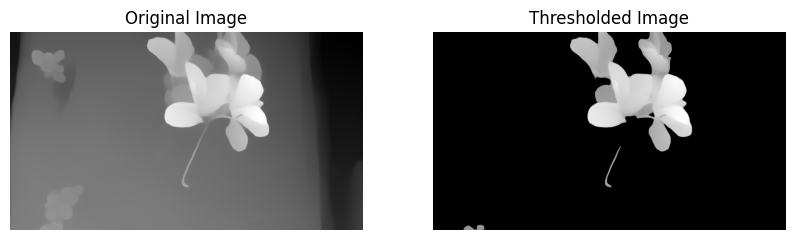

RGB_20231211_B11_0_depth.png
Pixel value with the highest frequency (in the range 15-255): 159
Mean of the focused histogram data: 147.09302372685184
Standard deviation of the focused histogram data: 53.17322333036499
Cutting point is: 190


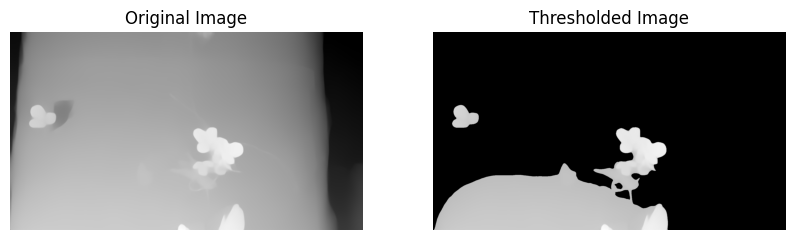

RGB_20231211_B11_1_depth.png
Pixel value with the highest frequency (in the range 15-255): 114
Mean of the focused histogram data: 115.19789255401234
Standard deviation of the focused histogram data: 50.643173496466815
Cutting point is: 144


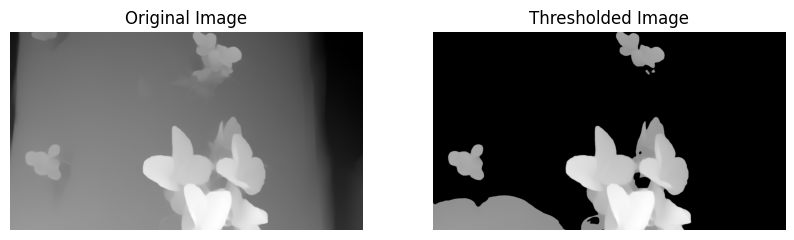

RGB_20231211_B11_15_depth.png
Pixel value with the highest frequency (in the range 15-255): 129
Mean of the focused histogram data: 117.8908275462963
Standard deviation of the focused histogram data: 48.63260964855524
Cutting point is: 157


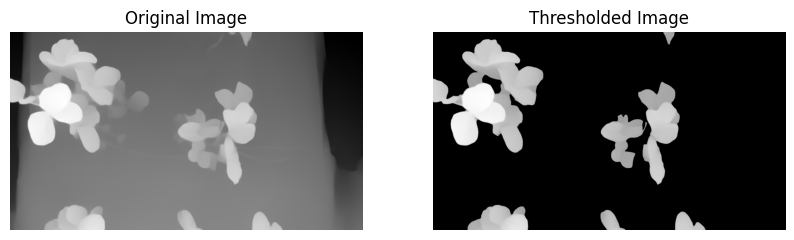

RGB_20231211_B11_4_depth.png
Pixel value with the highest frequency (in the range 15-255): 109
Mean of the focused histogram data: 113.67580536265432
Standard deviation of the focused histogram data: 47.09345492114214
Cutting point is: 136


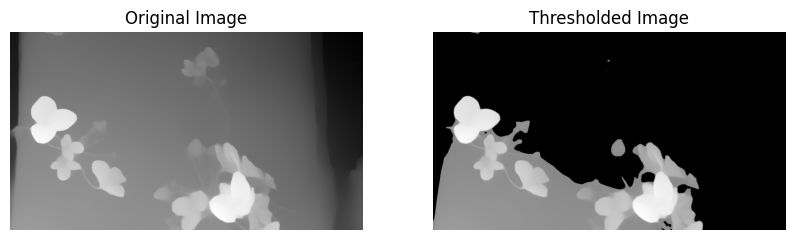

RGB_20231211_B11_10_depth.png
Pixel value with the highest frequency (in the range 15-255): 159
Mean of the focused histogram data: 144.0907605131173
Standard deviation of the focused histogram data: 51.74142368221758
Cutting point is: 189


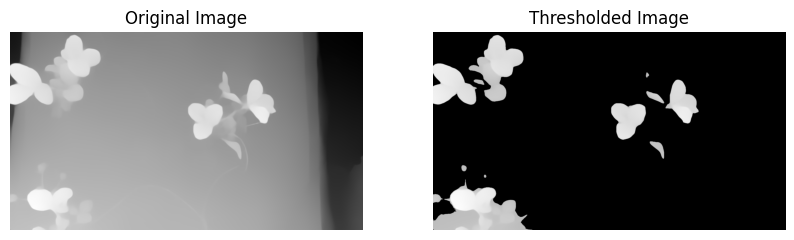

RGB_20231211_B11_7_depth.png
Pixel value with the highest frequency (in the range 15-255): 152
Mean of the focused histogram data: 135.9257778742284
Standard deviation of the focused histogram data: 51.21040551068798
Cutting point is: 182


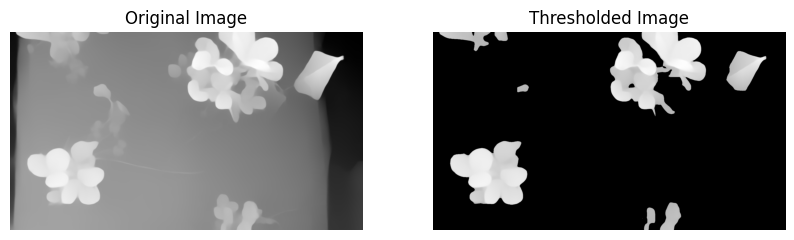

RGB_20231211_B11_12_depth.png
Pixel value with the highest frequency (in the range 15-255): 177
Mean of the focused histogram data: 143.24358892746915
Standard deviation of the focused histogram data: 52.26571538506091
Cutting point is: 208


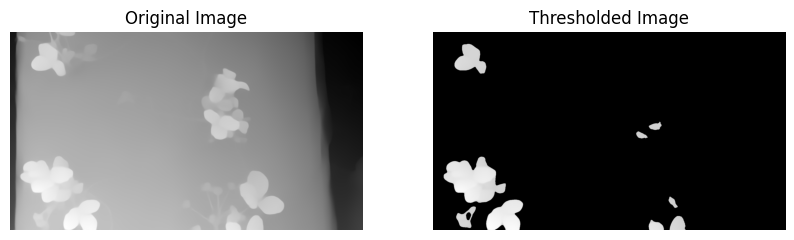

RGB_20231211_B11_11_depth.png
Pixel value with the highest frequency (in the range 15-255): 152
Mean of the focused histogram data: 138.00680217978396
Standard deviation of the focused histogram data: 48.51160477819204
Cutting point is: 180


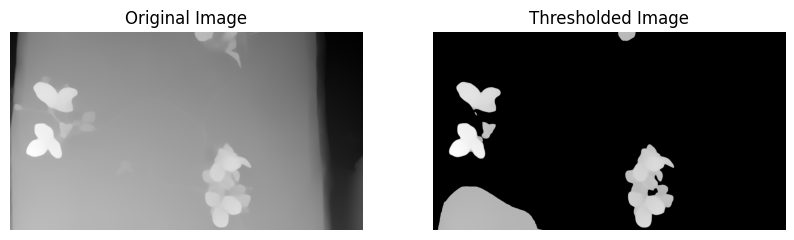

RGB_20231211_B11_14_depth.png
Pixel value with the highest frequency (in the range 15-255): 126
Mean of the focused histogram data: 124.41985725308642
Standard deviation of the focused histogram data: 52.89495744153661
Cutting point is: 157


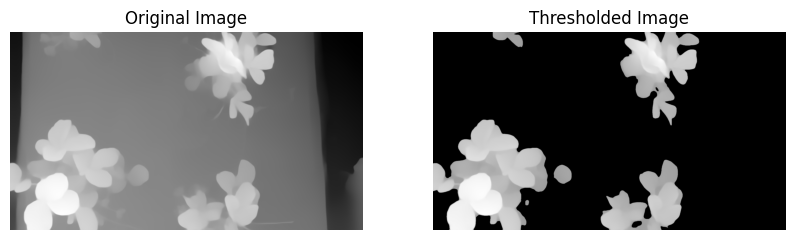

RGB_20231211_B11_8_depth.png
Pixel value with the highest frequency (in the range 15-255): 173
Mean of the focused histogram data: 147.69356577932098
Standard deviation of the focused histogram data: 53.282104415303785
Cutting point is: 204


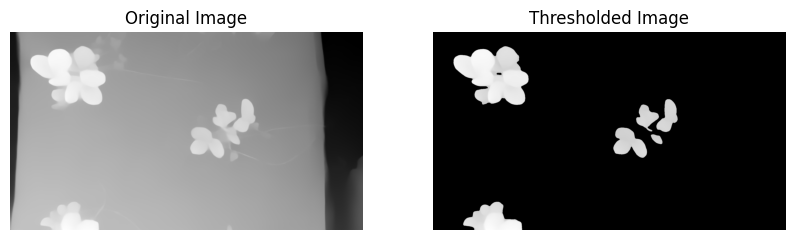

RGB_20231211_B11_6_depth.png
Pixel value with the highest frequency (in the range 15-255): 122
Mean of the focused histogram data: 115.10717640817901
Standard deviation of the focused histogram data: 46.22651345185238
Cutting point is: 149


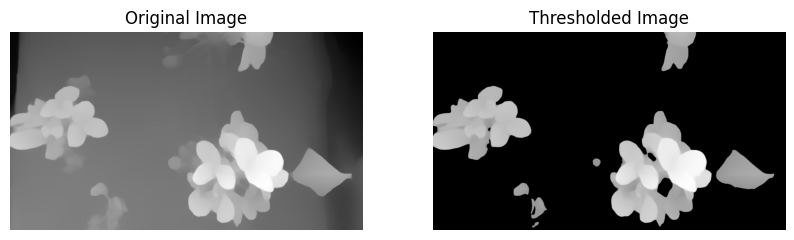

RGB_20231211_B11_3_depth.png
Pixel value with the highest frequency (in the range 15-255): 135
Mean of the focused histogram data: 104.8009447337963
Standard deviation of the focused histogram data: 35.84230361686448
Cutting point is: 155


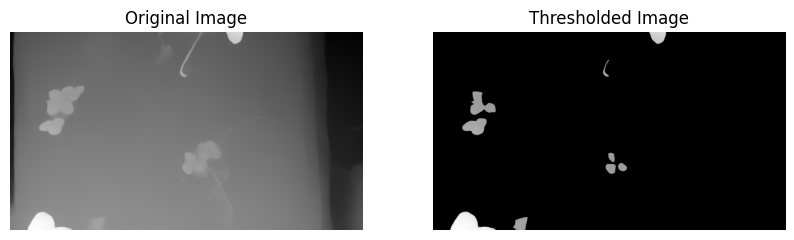

RGB_20231211_B11_9_depth.png
Pixel value with the highest frequency (in the range 15-255): 163
Mean of the focused histogram data: 144.96945891203703
Standard deviation of the focused histogram data: 53.90641507772585
Cutting point is: 194


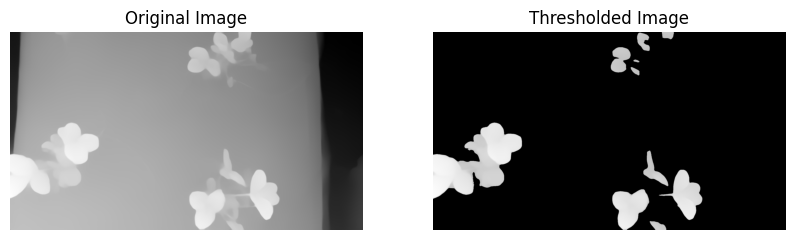

RGB_20231211_B11_13_depth.png
Pixel value with the highest frequency (in the range 15-255): 160
Mean of the focused histogram data: 136.16451051311728
Standard deviation of the focused histogram data: 47.09828931020435
Cutting point is: 187


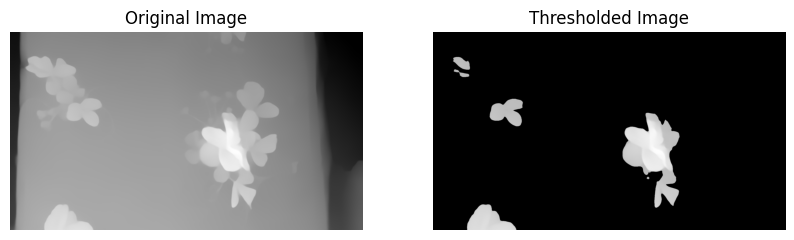

RGB_20231211_B11_5_depth.png
Pixel value with the highest frequency (in the range 15-255): 138
Mean of the focused histogram data: 120.28748505015432
Standard deviation of the focused histogram data: 50.326470823226735
Cutting point is: 168


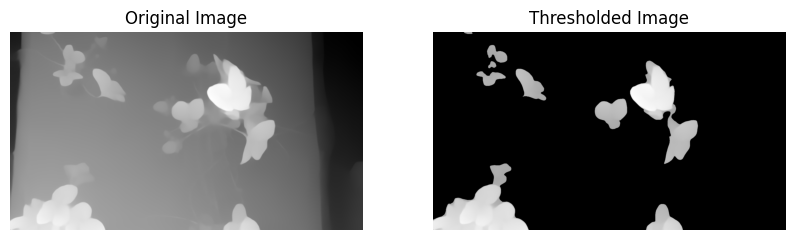

In [87]:
for image in another_images:
    print(image)
    cutting_point = focused_data_analysis_image(another_dir+image)
    filter_image(another_dir+image,cutting_point)

In [88]:
depth_info_dir = '20231204_B11_Depth/'
depth_images = os.listdir(depth_info_dir)

In [89]:
depth_images[0]

'RGB_20231204_B11_13_depth.png'

In [91]:
image = Image.open('20231204_B11_Depth/'+depth_images[0])

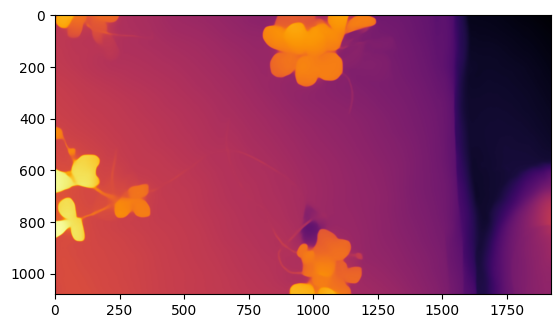

In [93]:
plt.imshow(image)
plt.show()

In [95]:
image_data = np.asarray(image)

In [96]:
image_data.shape

(1080, 1920, 3)

In [103]:
def apply_mask_on_inferno_images(grayscale_folder, inferno_folder, save_folder):
    # Ensure the save folder exists
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    
    # Iterate through the grayscale images
    for filename in os.listdir(grayscale_folder):
        grayscale_path = os.path.join(grayscale_folder, filename)
        inferno_path = os.path.join(inferno_folder, filename)
        
        # Check if the corresponding inferno image exists
        if os.path.exists(inferno_path):
            # Load the grayscale image
            grayscale_image = Image.open(grayscale_path).convert('L')
            grayscale_data = np.asarray(grayscale_image)
            
            # Load the inferno image
            inferno_image = Image.open(inferno_path)
            inferno_data = np.asarray(inferno_image)
            
            # Apply the mask: set pixels to 0 in the inferno image where the corresponding grayscale pixel is 0
            masked_inferno_data = np.where(grayscale_data[:,:,None] > 0, inferno_data, 0)
            
            # Convert numpy array back to an image
            masked_inferno_image = Image.fromarray(np.uint8(masked_inferno_data))
            
            # Save the masked inferno image
            save_path = os.path.join(save_folder, filename)
            masked_inferno_image.save(save_path)
            print(f'Saved masked image to {save_path}')

In [104]:
apply_mask_on_inferno_images('20231204_B11_Depth_grayscale_filtered/','20231204_B11_Depth/','20231204_B11_Depth_filtered/')

Saved masked image to 20231204_B11_Depth_filtered/RGB_20231204_B11_13_depth.png
Saved masked image to 20231204_B11_Depth_filtered/RGB_20231204_B11_7_depth.png
Saved masked image to 20231204_B11_Depth_filtered/RGB_20231204_B11_10_depth.png
Saved masked image to 20231204_B11_Depth_filtered/RGB_20231204_B11_11_depth.png
Saved masked image to 20231204_B11_Depth_filtered/RGB_20231204_B11_3_depth.png
Saved masked image to 20231204_B11_Depth_filtered/RGB_20231204_B11_18_depth.png
Saved masked image to 20231204_B11_Depth_filtered/RGB_20231204_B11_1_depth.png
Saved masked image to 20231204_B11_Depth_filtered/RGB_20231204_B11_0_depth.png
Saved masked image to 20231204_B11_Depth_filtered/RGB_20231204_B11_5_depth.png
Saved masked image to 20231204_B11_Depth_filtered/RGB_20231204_B11_16_depth.png
Saved masked image to 20231204_B11_Depth_filtered/RGB_20231204_B11_17_depth.png
Saved masked image to 20231204_B11_Depth_filtered/RGB_20231204_B11_8_depth.png
Saved masked image to 20231204_B11_Depth_filte